# Bar Charts

In [1]:
import altair as alt

In [2]:
population = alt.load_dataset('population')

## Single bar chart

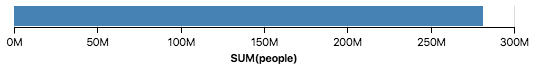

In [3]:
alt.Chart(population).mark_bar().encode(
    x='sum(people)',
).transform_data(filter="datum.year==2000")

## Bar chart

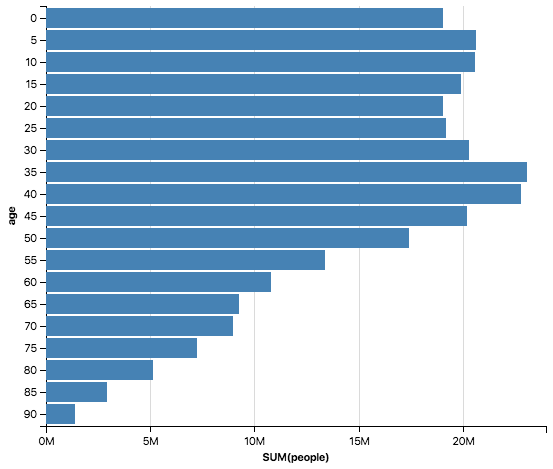

In [4]:
alt.Chart(population).mark_bar().encode(
    x='sum(people)',
    y='age:O'
).transform_data(filter="datum.year==2000")

## Sorted bar chart featuring brewer color palette

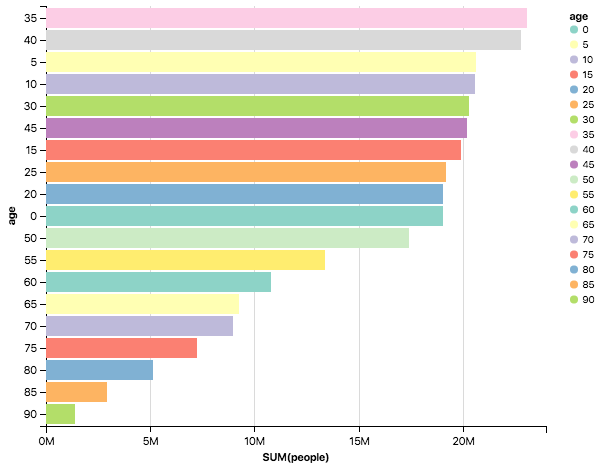

In [5]:
# https://jiffyclub.github.io/palettable/
from palettable import colorbrewer as cb

alt.Chart(population).mark_bar().encode(
    x='sum(people)',
    y=alt.Y('age:O', sort=alt.SortField(field='people', order='descending', op='sum')),
    color=alt.Color('age:N', scale=alt.Scale(range=cb.qualitative.Set3_12.hex_colors))
).transform_data(filter="datum.year==2000")

## Pandas Series to sorted bar chart

In [6]:
import pandas as pd
import numpy as np

data = pd.DataFrame()
data['counts'] = pd.Series(np.round(100 * np.abs(np.random.randn(8))))
data.index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
data['title'] = data.index
data

,counts,title
a,124.0,a
b,148.0,b
c,108.0,c
d,56.0,d
e,38.0,e
f,106.0,f
g,47.0,g
h,3.0,h


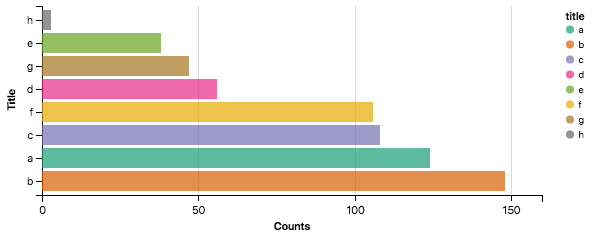

In [8]:
# using palettable imported above for the excellent brewer color palette
alt.Chart(data).mark_bar().encode(
    x=alt.X('counts', axis=alt.Axis(title='Counts')),
    y=alt.Y('title', sort=alt.SortField(field='counts', order='ascending', op='sum'), axis=alt.Axis(title='Title')),
    color=alt.Color('title:N', scale=alt.Scale(range=cb.qualitative.Dark2_8.hex_colors))
)

## Stacked bar chart

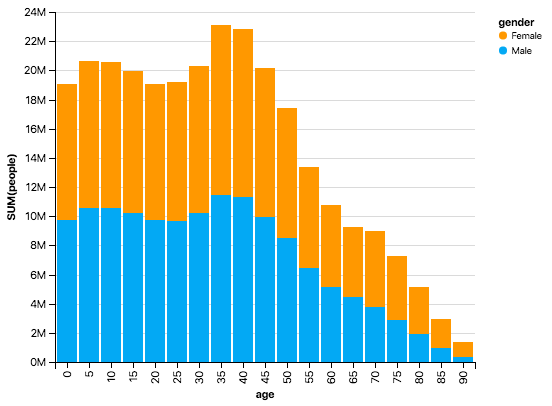

In [9]:
chart = alt.Chart(population).mark_bar().encode(
    x='age:O',
    y='sum(people):Q',
    color=alt.Color('gender:N', scale=alt.Scale(range=["#FF9800", "#03A9F4"]))
).transform_data(
    filter='datum.year==2000',
    calculate=[alt.Formula(field='gender', expr='datum.sex == 2 ? "Female" : "Male"')]
)
t = chart.transform # save the transform to re-use on later charts
chart

## Layered bar chart

Re-using the transform from above:

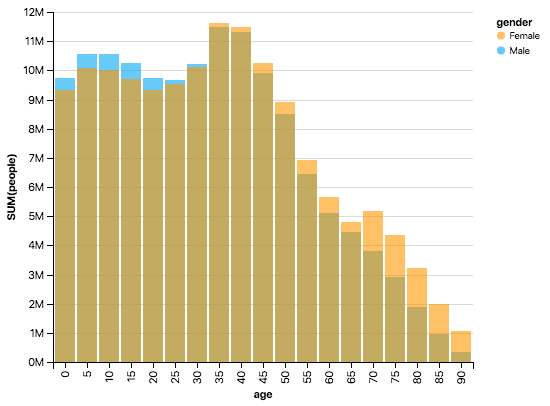

In [10]:
alt.Chart(population, transform=t).mark_bar(
    opacity=0.6,
    stacked='none'
).encode(
    x='age:O',
    y='sum(people):Q',
    color=alt.Color('gender:N', scale=alt.Scale(range=["#FF9800", "#03A9F4"]))
)

## Normalized stacked bar chart

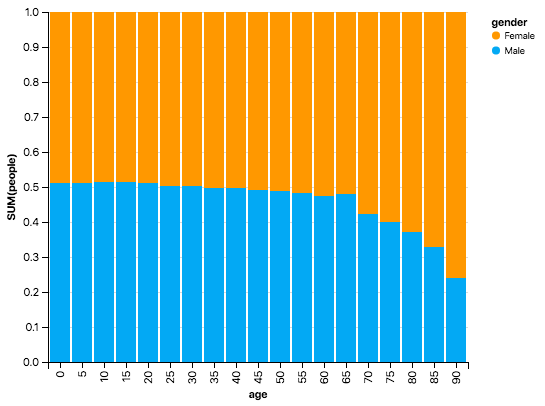

In [11]:
alt.Chart(population, transform=t).mark_bar(
    stacked='normalize'
).encode(
    x='age:O',
    y='sum(people):Q',
    color=alt.Color('gender:N', scale=alt.Scale(range=["#FF9800", "#03A9F4"]))
)

## Grouped bar chart

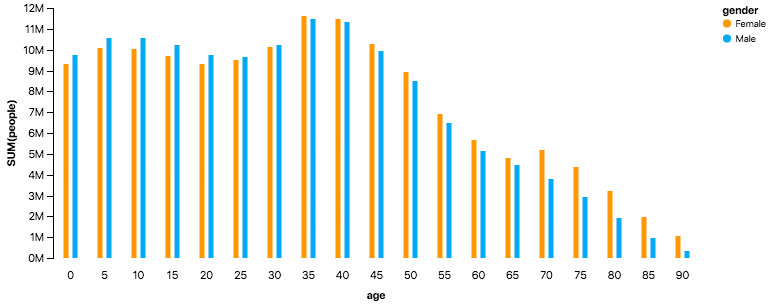

In [12]:
alt.Chart(population, transform=t).mark_bar().encode(
    alt.X('gender:N', axis=False, scale=alt.Scale(bandSize=6)),
    alt.Y('sum(people):Q', axis=alt.Axis(grid=False)),
    alt.Color('gender:N', scale=alt.Scale(range=["#FF9800", "#03A9F4"])),
    alt.Column('age:O', axis=alt.Axis(orient='bottom'))
).configure(
    facet=alt.FacetConfig(cell=alt.CellConfig(strokeWidth=0, height=250))
)

## Histogram

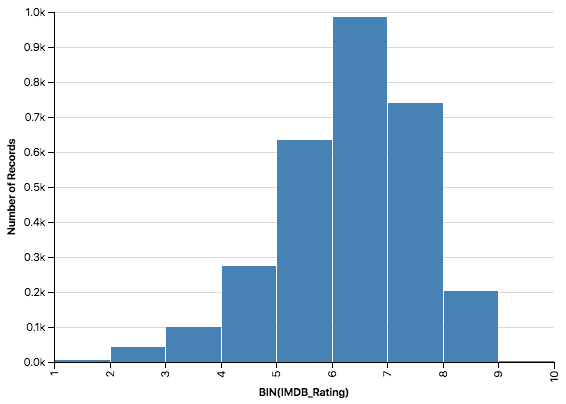

In [13]:
data = alt.load_dataset('movies')
alt.Chart(data).mark_bar().encode(
    x=alt.X('IMDB_Rating', bin=alt.Bin(maxbins=10)),
    y='count(*):Q',
)